In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
import plotly.express as px
from scipy.stats import skew, kurtosis
from IPython.display import display, clear_output

In [3]:
# Load datasets
dataset_1 = pd.read_csv("./Data_Provider1.csv")
dataset_2 = pd.read_csv("./Data_Provider2.csv")
dataset_3 = pd.read_csv("./Data_Provider3.csv")

In [4]:
# Check for  number of rows and columns, datatypes, and missing values
dataset_1.info()
dataset_2.info()
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Aisle Number              450 non-null    object 
 1   Quad Number               450 non-null    object 
 2   Timestamp                 450 non-null    object 
 3   RSSI (dBm)                450 non-null    float64
 4   TCP Upload Speed (Mbps)   450 non-null    float64
 5   TCP Upload QoS (%)        450 non-null    float64
 6   TCP Round Trip Time (ms)  450 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Aisle Number              262 non-null    object 
 1   Quad Number               262 non-null    object 
 2   Timestamp          

## Data Cleaning:


In [5]:
# Change the datatype of Timestamp from object to datetime
dataset_1['Timestamp'] = pd.to_datetime(dataset_1['Timestamp'])
dataset_2['Timestamp'] = pd.to_datetime(dataset_2['Timestamp'])
dataset_3['Timestamp'] = pd.to_datetime(dataset_3['Timestamp'])

In [6]:
# Remove rows with all missing values
dataset_1 = dataset_1.dropna(how='all')

dataset_2 = dataset_2.dropna(how='all')

dataset_3 = dataset_3.dropna(how='all')

In [7]:
# Change the datatype of the Aisle Number and Block Number(given as Quad Number in datasets) from object to string
dataset_1['Aisle Number'] = dataset_1['Aisle Number'].astype(str)
dataset_1['Quad Number'] = dataset_1['Quad Number'].astype(str)
dataset_2['Aisle Number'] = dataset_2['Aisle Number'].astype(str)
dataset_2['Quad Number'] = dataset_2['Quad Number'].astype(str)
dataset_3['Aisle Number'] = dataset_3['Aisle Number'].astype(str)
dataset_3['Quad Number'] = dataset_3['Quad Number'].astype(str)

In [8]:
# Check if there are any NaN values
print(dataset_1.isnull().sum())
print(dataset_2.isnull().sum())
print(dataset_3.isnull().sum())

Aisle Number                0
Quad Number                 0
Timestamp                   0
RSSI (dBm)                  0
TCP Upload Speed (Mbps)     0
TCP Upload QoS (%)          0
TCP Round Trip Time (ms)    0
dtype: int64
Aisle Number                0
Quad Number                 0
Timestamp                   0
RSSI (dBm)                  0
TCP Upload Speed (Mbps)     0
TCP Upload QoS (%)          0
TCP Round Trip Time (ms)    0
dtype: int64
Aisle Number                0
Quad Number                 0
Timestamp                   0
RSSI (dBm)                  0
TCP Upload Speed (Mbps)     0
TCP Upload QoS (%)          0
TCP Round Trip Time (ms)    0
dtype: int64


In [9]:
# Since, the grid (Aisle Number x Quad Number) is a 8x8 grid, the data should have no more than 64 unique values
# Let's check if the data has more than 64 values first
print("Number of data points in dataset 1: ", dataset_1.shape[0])
print("Number of data points in dataset 2: ", dataset_2.shape[0])
print("Number of data points in dataset 3: ", dataset_3.shape[0])

Number of data points in dataset 1:  450
Number of data points in dataset 2:  262
Number of data points in dataset 3:  330


We have way more than 64 values. I can think of 2 ways to deal with duplicates: Either we take the average of the duplicates or we take the maximum value. I will use both approaches and see which one gives better results.


In [10]:
# Now, let's check for duplicate rows based on combination of Aisle Number and Block Number(given as Quad Number in the dataset)
print("Number of duplicate rows in dataset 1: ", dataset_1.duplicated(
    subset=['Aisle Number', 'Quad Number']).sum())
print("Number of duplicate rows in dataset 2: ", dataset_2.duplicated(
    subset=['Aisle Number', 'Quad Number']).sum())
print("Number of duplicate rows in dataset 3: ", dataset_3.duplicated(
    subset=['Aisle Number', 'Quad Number']).sum())

Number of duplicate rows in dataset 1:  386
Number of duplicate rows in dataset 2:  198
Number of duplicate rows in dataset 3:  268


### Approach 1: Average of duplicates

One consideration is that the RSSI is in dBm, which is a logarithmic scale. So, taking the average of the duplicates is equivalent to taking the geometric mean of the RSSI values.

So, I will convert the RSSI values to linear scale(mW), take the average of the duplicates, and then convert it back to log scale(dBm).


In [11]:
dataset_1["RSSI_linear"] = 10 ** (dataset_1["RSSI (dBm)"] / 10)
dataset_2["RSSI_linear"] = 10 ** (dataset_2["RSSI (dBm)"] / 10)
dataset_3["RSSI_linear"] = 10 ** (dataset_3["RSSI (dBm)"] / 10)

df_avg1 = dataset_1.groupby(["Aisle Number", "Quad Number"], as_index=False).agg(
    {
        "RSSI_linear": "mean",
        "TCP Upload Speed (Mbps)": "mean",
        "TCP Upload QoS (%)": "mean",
        "TCP Round Trip Time (ms)": "mean"
    }
)

df_avg2 = dataset_2.groupby(["Aisle Number", "Quad Number"], as_index=False).agg(
    {
        "RSSI_linear": "mean",
        "TCP Upload Speed (Mbps)": "mean",
        "TCP Upload QoS (%)": "mean",
        "TCP Round Trip Time (ms)": "mean"
    }
)

df_avg3 = dataset_3.groupby(["Aisle Number", "Quad Number"], as_index=False).agg(
    {
        "RSSI_linear": "mean",
        "TCP Upload Speed (Mbps)": "mean",
        "TCP Upload QoS (%)": "mean",
        "TCP Round Trip Time (ms)": "mean"
    }
)

df_avg1["RSSI (dBm)"] = 10 * np.log10(df_avg1["RSSI_linear"])
df_avg2["RSSI (dBm)"] = 10 * np.log10(df_avg2["RSSI_linear"])
df_avg3["RSSI (dBm)"] = 10 * np.log10(df_avg3["RSSI_linear"])

# Drop the temporary linear column
df_avg1 = df_avg1.drop(columns=["RSSI_linear"])
df_avg2 = df_avg2.drop(columns=["RSSI_linear"])
df_avg3 = df_avg3.drop(columns=["RSSI_linear"])

# Check if the data has more than 64 values
print("Number of data points in dataset 1 after aggregation: ",
      df_avg1.shape[0])
print("Number of data points in dataset 2 after aggregation: ",
      df_avg2.shape[0])
print("Number of data points in dataset 3 after aggregation: ",
      df_avg3.shape[0])

Number of data points in dataset 1 after aggregation:  64
Number of data points in dataset 2 after aggregation:  64
Number of data points in dataset 3 after aggregation:  62


### Approach 2: Maximum value

I will take the maximum value of the duplicates.

Before calculating maximum values, I thought it would be better to use weights based on importance of the features. I will use the following weights provided by the organizers:

`(RSSI) * 40% , (TCP Upload Speed) * 40% ,(TCP Upload QoS) * 10% , (TCP RTT) * 10%`


In [12]:
weights = [0.4, 0.4, 0.1, 0.1]
df_weighted_max1 = dataset_1.copy()
df_weighted_max2 = dataset_2.copy()
df_weighted_max3 = dataset_3.copy()


def calculate_weighted_score(df):
    # To avoid zero division error, add a small value to the denominator if it is zero + inverse transform RTT
    df["Transformed RTT"] = 1 / (df["TCP Round Trip Time (ms)"] + 1e-9)

    # Normalize the features to a 0-1 range.  This will make the weights more meaningful.
    df["RSSI (dBm)"] = (df["RSSI (dBm)"] - df["RSSI (dBm)"].min()) / \
        (df["RSSI (dBm)"].max() - df["RSSI (dBm)"].min())
    df["TCP Upload Speed (Mbps)"] = (df["TCP Upload Speed (Mbps)"] - df["TCP Upload Speed (Mbps)"].min()
                                     ) / (df["TCP Upload Speed (Mbps)"].max() - df["TCP Upload Speed (Mbps)"].min())
    df["TCP Upload QoS (%)"] = (df["TCP Upload QoS (%)"] - df["TCP Upload QoS (%)"].min()
                                ) / (df["TCP Upload QoS (%)"].max() - df["TCP Upload QoS (%)"].min())
    df["Transformed RTT"] = (df["Transformed RTT"] - df["Transformed RTT"].min()) / (
        df["Transformed RTT"].max() - df["Transformed RTT"].min())

    weighted_score = (
        df["RSSI (dBm)"] * weights[0] +
        df["TCP Upload Speed (Mbps)"] * weights[1] +
        df["TCP Upload QoS (%)"] * weights[2] +
        df["Transformed RTT"] * weights[3]
    )
    return weighted_score


df_weighted_max1["Weighted Score"] = calculate_weighted_score(df_weighted_max1)
df_weighted_max2["Weighted Score"] = calculate_weighted_score(df_weighted_max2)
df_weighted_max3["Weighted Score"] = calculate_weighted_score(df_weighted_max3)


def get_max_score(df, df_weighted, dataset_name):
    idx = df_weighted.groupby(["Aisle Number", "Quad Number"])[
        "Weighted Score"].idxmax()
    idx = idx.dropna()

    if idx.empty:
        print(
            f"Warning: No valid max rows found for {dataset_name}. Returning empty DataFrame.")
        return pd.DataFrame(columns=["Aisle Number", "Quad Number", "RSSI (dBm)", "TCP Upload Speed (Mbps)", "TCP Upload QoS (%)", "TCP Round Trip Time (ms)"])

    try:
        df_max = df.loc[idx, ["Aisle Number", "Quad Number",
                              "RSSI (dBm)", "TCP Upload Speed (Mbps)", "TCP Upload QoS (%)", "TCP Round Trip Time (ms)"]].reset_index(drop=True)
    except KeyError as e:
        print(f"KeyError: {e}")
        print(f"Invalid index values in idx for {dataset_name}: {idx.index}")
        raise

    return df_max


df_max1 = get_max_score(dataset_1, df_weighted_max1, "dataset_1")
df_max2 = get_max_score(dataset_2, df_weighted_max2, "dataset_2")
df_max3 = get_max_score(dataset_3, df_weighted_max3, "dataset_3")


print("Number of data points in dataset 1 after aggregation: ",
      df_max1.shape[0])
print("Number of data points in dataset 2 after aggregation: ",
      df_max2.shape[0])
print("Number of data points in dataset 3 after aggregation: ",
      df_max3.shape[0])

Number of data points in dataset 1 after aggregation:  64
Number of data points in dataset 2 after aggregation:  64
Number of data points in dataset 3 after aggregation:  62


### Ensure that we have 64 values

I will use the following approach to ensure that we have 64 values, since we already have dealt with duplicates, the only way we can have less than 64 values is if we have missing values. I will use the following approach to deal with missing values:


In [13]:
# Ensure all combinations of Aisle Number and Quad Number are present in the dataset, even if they have missing values because later we will be using these combinations to create grid plots

def ensure_all_combinations(df):
    aisle_numbers = [f"A{i}" for i in range(1, 9)]
    quad_numbers = [f"B{i}" for i in range(1, 9)]
    all_combinations = [(a, q) for a in aisle_numbers for q in quad_numbers]

    existing_combinations = list(zip(df["Aisle Number"], df["Quad Number"]))

    missing_combinations = [
        comb for comb in all_combinations if comb not in existing_combinations]

    new_rows = []
    for aisle, quad in missing_combinations:
        new_row = {
            "Aisle Number": aisle,
            "Quad Number": quad,
            "RSSI (dBm)": np.nan,
            "TCP Upload Speed (Mbps)": np.nan,
            "TCP Upload QoS (%)": np.nan,
            "TCP Round Trip Time (ms)": np.nan,
        }
        new_rows.append(new_row)

    if new_rows:
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

    df['isDataPresent'] = ~df[['RSSI (dBm)', 'TCP Upload Speed (Mbps)',
                               'TCP Upload QoS (%)', 'TCP Round Trip Time (ms)']].isna().all(axis=1)

    return df


df_avg1 = ensure_all_combinations(df_avg1)
df_avg2 = ensure_all_combinations(df_avg2)
df_avg3 = ensure_all_combinations(df_avg3)
df_max1 = ensure_all_combinations(df_max1)
df_max2 = ensure_all_combinations(df_max2)
df_max3 = ensure_all_combinations(df_max3)

print("Number of data points in dataset 1 after ensuring all combinations: ",
      df_avg1.shape[0])
print("Number of data points in dataset 2 after ensuring all combinations: ",
      df_avg2.shape[0])
print("Number of data points in dataset 3 after ensuring all combinations: ",
      df_avg3.shape[0])

Number of data points in dataset 1 after ensuring all combinations:  64
Number of data points in dataset 2 after ensuring all combinations:  64
Number of data points in dataset 3 after ensuring all combinations:  64


For dataset 3 we have 2 missing values in both average and maximum values.

The missing values are in the following rows:

- A7 B2
- A7 B8


## EDA (Exploratory Data Analysis):


### Histogram for all KPIs for both approaches

I decided to use plotly for the visualizations since it is more interactive and to avoid information overload.


In [14]:
bins = {
    # Use -inf and inf
    'RSSI (dBm)': [-float('inf'), -105, -96, -86, float('inf')],
    # Start from 0 for speed
    'TCP Upload Speed (Mbps)': [0, 2, 7, 15, 30, float('inf')],
    'TCP Upload QoS (%)': [0, 30, 50, 70, 100],
    # Start from 0 for time
    'TCP Round Trip Time (ms)': [0, 50, 100, 200, float('inf')]
}

bin_labels = {
    'RSSI (dBm)': ['Poor', 'Okay', 'Fair', 'Good'],
    'TCP Upload Speed (Mbps)': ['Poor', 'Usable', 'Okay', 'Fair', 'Good'],
    'TCP Upload QoS (%)': ['Poor', 'Okay', 'Fair', 'Good'],
    'TCP Round Trip Time (ms)': ['Good', 'Fair', 'Okay', 'Poor']
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

color_map = {
    'Poor': 'red',
    'Usable': 'orange',
    'Acceptable': 'goldenrod',
    'Adequate': 'yellow',
    'Okay': 'yellow',
    'Fair': 'lightgreen',
    'Good': 'green',
    'Missing': 'lightgrey'
}

aisle_numbers = [f'A{i}' for i in range(1, 9)]
quad_numbers = [f'B{i}' for i in range(1, 9)]

In [15]:
def create_interactive_histograms(num_datasets, dfs_avg, dfs_max):
    if num_datasets > len(dfs_avg) or num_datasets > len(dfs_max):
        raise ValueError(
            "num_datasets exceeds the number of provided DataFrames.")

    if len(colors) < num_datasets:
        raise ValueError(
            "Not enough colors defined for the number of datasets.")

    dataset_names = [f'Dataset {i+1}' for i in range(num_datasets)]

    metric_dropdown = widgets.Dropdown(
        options=['RSSI (dBm)', 'TCP Upload Speed (Mbps)',
                 'TCP Upload QoS (%)', 'TCP Round Trip Time (ms)'],
        value='RSSI (dBm)',
        description='Metric:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    data_type_toggle = widgets.ToggleButtons(
        options=['Average', 'Maximum'],
        value='Average',
        description='Data Type:',
        button_style='',
        tooltips=['Show average values', 'Show maximum values'],
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='40%')
    )

    def update_plot(metric=None, data_type=None):
        if metric is None:
            metric = metric_dropdown.value
        if data_type is None:
            data_type = data_type_toggle.value

        if data_type == 'Average':
            dfs = dfs_avg[:num_datasets]
        else:
            dfs = dfs_max[:num_datasets]

        fig = make_subplots(rows=1, cols=num_datasets,
                            subplot_titles=[
                                f"{dataset_names[i]} - {metric}" for i in range(num_datasets)],
                            shared_yaxes=True)

        max_count = 0

        for i, df in enumerate(dfs):
            categories = pd.cut(df[metric], bins=bins[metric],
                                labels=bin_labels[metric], right=False)
            category_counts = categories.value_counts().reindex(
                bin_labels[metric], fill_value=0)

            if max(category_counts) > max_count:
                max_count = max(category_counts)

            fig.add_trace(
                go.Bar(
                    x=category_counts.index,
                    y=category_counts.values,
                    name=dataset_names[i],
                    marker_color=colors[i],
                    hovertemplate='Category: %{x}<br>Count: %{y}<extra></extra>'
                ),
                row=1, col=i + 1
            )

        fig.update_layout(
            title=f'{metric} Values Comparison - {data_type}',
            height=500,
            width=350 * num_datasets,
            showlegend=False,
            template='plotly_white',
            margin=dict(l=40, r=40, t=80, b=40)
        )

        for i in range(1, num_datasets + 1):
            fig.update_yaxes(title_text='Count' if i == 1 else None,
                             range=[0, max_count * 1.1],
                             row=1, col=i)
            fig.update_xaxes(title_text='Category', row=1, col=i)

        return fig

    fig = update_plot()

    plot_output = widgets.Output()

    with plot_output:
        display(fig)

    def on_change(change):
        plot_output.clear_output(wait=True)
        with plot_output:
            fig = update_plot(metric_dropdown.value, data_type_toggle.value)
            display(fig)

    metric_dropdown.observe(on_change, names='value')
    data_type_toggle.observe(on_change, names='value')

    controls = widgets.HBox([metric_dropdown, data_type_toggle])
    dashboard = widgets.VBox([controls, plot_output])

    return dashboard

In [16]:
dfs_avg = [df_avg1, df_avg2, df_avg3]
dfs_max = [df_max1, df_max2, df_max3]

num_datasets = 3

histogram_dashboard = create_interactive_histograms(
    num_datasets, dfs_avg, dfs_max)
display(histogram_dashboard)

print("Use the dropdown and toggle buttons above to switch between different metrics and data types (Average/Maximum).")
print("Hover over the bars to see detailed values.")

Use the dropdown and toggle buttons above to switch between different metrics and data types (Average/Maximum).
Hover over the bars to see detailed values.


### Scatter plot for all KPIs for both approaches

In [17]:
def interactive_scatter_plot(dfs1, dfs2):
    params = ['RSSI (dBm)', 'TCP Upload Speed (Mbps)',
              'TCP Upload QoS (%)', 'TCP Round Trip Time (ms)']
    param_selector = widgets.Dropdown(
        options=params,
        description='Parameter:',
        style={'description_width': 'initial'}
    )

    dataset_selector = widgets.Dropdown(
        options=[('Average', 0), ('Maximum', 1)],
        description='Dataset:',
        style={'description_width': 'initial'}
    )

    output = widgets.Output()

    def update_plot(param, dataset_group):
        with output:
            output.clear_output(wait=True)
            dfs = dfs1 if dataset_group == 0 else dfs2

            fig = go.Figure()
            for i, df in enumerate(dfs):
                fig.add_trace(go.Scatter(
                    x=df.index, y=df[param], mode='markers', name=f'Cellular Provider {i+1}'))

            fig.update_layout(title=f'Comparison of {param} Across Datasets in Group {dataset_group+1}',
                              xaxis_title='Index',
                              yaxis_title=param,
                              template='plotly_white')
            fig.show()

    widgets.interactive(update_plot, param=param_selector,
                        dataset_group=dataset_selector)

    display(param_selector, dataset_selector, output)
    update_plot(params[0], 0)

In [18]:
dfs1 = [df_avg1, df_avg2, df_avg3]
dfs2 = [df_max1, df_max2, df_max3]
interactive_scatter_plot(dfs1, dfs2)

Dropdown(description='Parameter:', options=('RSSI (dBm)', 'TCP Upload Speed (Mbps)', 'TCP Upload QoS (%)', 'TC…

Dropdown(description='Dataset:', options=(('Average', 0), ('Maximum', 1)), style=DescriptionStyle(description_…

Output()

### Statistical Analysis:

We create an interactive dashboard for analyzing and visualizing statistical distributions across multiple datasets. The dashboard enables us to easily switch between datasets, parameters, and visualization types (histograms, box plots, violin plots), while also providing comprehensive statistical metrics (mean, median, skewness, etc.)


In [19]:
def create_interactive_dashboard(dfs_avg, dfs_max=None, bins=None, bin_labels=None):
    stats = {}
    all_columns = set()

    for i, df in enumerate(dfs_avg):
        stats[f'Dataset {i+1}'] = {}
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        all_columns.update(numeric_cols)

        for col in numeric_cols:
            data = df[col].dropna()
            if data.empty:
                continue

            stats[f'Dataset {i+1}'][col] = {
                'Mean': np.mean(data),
                'Median': np.median(data),
                'Mode': data.mode()[0] if not data.mode().empty else np.nan,
                'Standard Deviation': np.std(data),
                'Variance': np.var(data),
                'Skewness': skew(data) if len(data) > 1 else np.nan,
                'Kurtosis': kurtosis(data) if len(data) > 1 else np.nan,
                'Range': np.ptp(data),
                'Interquartile Range': np.percentile(data, 75) - np.percentile(data, 25),
                'Outliers': data[(data < np.percentile(data, 25) - 1.5 * (np.percentile(data, 75) - np.percentile(data, 25))) |
                                 (data > np.percentile(data, 75) + 1.5 * (np.percentile(data, 75) - np.percentile(data, 25)))].tolist()
            }

    all_columns = sorted(list(all_columns))

    dataset_dropdown = widgets.Dropdown(
        options=[f'Dataset {i+1}' for i in range(len(dfs_avg))],
        value=f'Dataset 1',
        description='Dataset:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )

    column_dropdown = widgets.Dropdown(
        options=all_columns,
        value=all_columns[0] if all_columns else None,
        description='Parameter:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )

    view_type = widgets.RadioButtons(
        options=['Statistics', 'Histogram', 'Box Plot',
                 'Violin Plot', 'Compare Datasets'],
        value='Statistics',
        description='View:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )

    output = widgets.Output()

    def update_view(*args):
        with output:
            clear_output(wait=True)
            dataset = dataset_dropdown.value
            column = column_dropdown.value
            view = view_type.value

            if not column or column not in dfs_avg[int(dataset.split()[-1])-1].columns:
                print(f"Column {column} not found in {dataset}")
                return

            if view == 'Statistics':
                if column in stats[dataset]:
                    stats_df = pd.DataFrame.from_dict(
                        stats[dataset][column], orient='index', columns=['Value'])
                    display(stats_df)
                else:
                    print(f"No statistics available for {column} in {dataset}")

            elif view == 'Histogram':
                fig = px.histogram(
                    dfs_avg[int(dataset.split()[-1])-1],
                    x=column,
                    nbins=20,
                    title=f'Distribution of {column} in {dataset}',
                    template='plotly_white'
                )
                fig.show()

            elif view == 'Box Plot':
                fig = px.box(
                    dfs_avg[int(dataset.split()[-1])-1],
                    y=column,
                    title=f'Box Plot of {column} in {dataset}',
                    template='plotly_white'
                )
                fig.show()

            elif view == 'Violin Plot':
                fig = px.violin(
                    dfs_avg[int(dataset.split()[-1])-1],
                    y=column,
                    box=True,
                    title=f'Violin Plot of {column} in {dataset}',
                    template='plotly_white'
                )
                fig.show()

            elif view == 'Compare Datasets':
                fig = go.Figure()
                for i, df_name in enumerate([f'Dataset {j+1}' for j in range(len(dfs_avg))]):
                    if column in dfs_avg[i].columns:
                        data = dfs_avg[i][column].dropna()
                        if not data.empty:
                            fig.add_trace(go.Violin(
                                y=data,
                                name=df_name,
                                box_visible=True,
                                meanline_visible=True
                            ))

                fig.update_layout(
                    title=f'Comparison of {column} Across Datasets',
                    template='plotly_white',
                    xaxis_title='Dataset',
                    yaxis_title=column
                )
                fig.show()

    dataset_dropdown.observe(update_view, 'value')
    column_dropdown.observe(update_view, 'value')
    view_type.observe(update_view, 'value')

    controls = widgets.VBox([
        widgets.HTML("<h2>Statistical Distribution Dashboard</h2>"),
        dataset_dropdown,
        column_dropdown,
        view_type
    ])

    dashboard = widgets.HBox([controls, output])
    display(dashboard)

    update_view()

In [ ]:
create_interactive_dashboard(dfs_avg, dfs_max, bins, bin_labels)

## Coverage Visualization:


In [ ]:
def create_interactive_grid_plots(num_datasets, dfs_avg, dfs_max, show_repeaters=False, repeater_locations=None):
    if num_datasets > len(dfs_avg) or num_datasets > len(dfs_max):
        raise ValueError(
            "num_datasets exceeds the number of provided DataFrames.")

    if show_repeaters and repeater_locations:
        if len(repeater_locations) != num_datasets:
            print(
                f"Warning: repeater_locations has {len(repeater_locations)} datasets but {num_datasets} datasets were specified.")
            # Fill with empty arrays if needed
            if len(repeater_locations) < num_datasets:
                repeater_locations.extend(
                    [[] for _ in range(num_datasets - len(repeater_locations))])

    dataset_names = [f'Dataset {i+1}' for i in range(num_datasets)]

    metric_dropdown = widgets.Dropdown(
        options=['RSSI (dBm)', 'TCP Upload Speed (Mbps)',
                 'TCP Upload QoS (%)', 'TCP Round Trip Time (ms)'],
        value='RSSI (dBm)',
        description='Metric:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    data_type_toggle = widgets.ToggleButtons(
        options=['Average', 'Maximum'],
        value='Average',
        description='Data Type:',
        button_style='',
        tooltips=['Show average values', 'Show maximum values'],
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='40%')
    )

    dataset_dropdown = widgets.Dropdown(
        options=[f'Dataset {i+1}' for i in range(num_datasets)],
        value=f'Dataset 1',
        description='Dataset:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    plot_output = widgets.Output()

    bin_labels = {
        'RSSI (dBm)': ['Poor', 'Okay', 'Fair', 'Good'],
        'TCP Upload Speed (Mbps)': ['Poor', 'Usable', 'Okay', 'Fair', 'Good'],
        'TCP Upload QoS (%)': ['Poor', 'Okay', 'Fair', 'Good'],
        'TCP Round Trip Time (ms)': ['Good', 'Fair', 'Okay', 'Poor']
    }

    def create_grid_plot(df, metric, dataset_index):
        current_labels = bin_labels[metric]
        color_map = {}

        # Standard colors (red to green)
        # Red, Orange, Yellow, Light Green, Forest Green
        standard_colors = ['#FF0000', '#FFA500',
                           '#FFFF00', '#90EE90', '#228B22']

        # For RTT, we need to invert the colors since lower values are better
        if metric == 'TCP Round Trip Time (ms)':
            colors = standard_colors[::-1]
        else:
            colors = standard_colors

        for i, label in enumerate(current_labels):
            if i < len(colors):
                color_map[label] = colors[i]

        color_map['Missing'] = 'lightgrey'

        sorted_quad_numbers = sorted(quad_numbers)

        grid_data = pd.DataFrame(
            index=sorted_quad_numbers, columns=aisle_numbers)
        grid_categories = pd.DataFrame(
            index=sorted_quad_numbers, columns=aisle_numbers)

        total_cells = len(sorted_quad_numbers) * len(aisle_numbers)
        missing_cells = 0

        for aisle in aisle_numbers:
            for quad in sorted_quad_numbers:
                subset = df[(df['Aisle Number'] == aisle)
                            & (df['Quad Number'] == quad)]

                if not subset.empty and subset['isDataPresent'].any():
                    valid_subset = subset[subset['isDataPresent']]
                    if not valid_subset.empty:
                        value = valid_subset[metric].mean()
                        grid_data.loc[quad, aisle] = value

                        try:
                            categories = pd.cut(
                                [value], bins=bins[metric], labels=current_labels, right=False)
                            grid_categories.loc[quad, aisle] = categories[0]
                        except:
                            grid_categories.loc[quad, aisle] = 'Missing'
                            missing_cells += 1
                    else:
                        grid_data.loc[quad, aisle] = np.nan
                        grid_categories.loc[quad, aisle] = 'Missing'
                        missing_cells += 1
                else:
                    grid_data.loc[quad, aisle] = np.nan
                    grid_categories.loc[quad, aisle] = 'Missing'
                    missing_cells += 1

        print(f"Total cells: {total_cells}, Missing cells: {missing_cells}")

        color_matrix = []
        for quad in sorted_quad_numbers:
            row = []
            for aisle in aisle_numbers:
                category = grid_categories.loc[quad, aisle]
                row.append(color_map.get(category, 'lightgrey'))
            color_matrix.append(row)

        text_matrix = []
        z_matrix = []

        for i, quad in enumerate(sorted_quad_numbers):
            text_row = []
            z_row = []
            for j, aisle in enumerate(aisle_numbers):
                value = grid_data.loc[quad, aisle]
                category = grid_categories.loc[quad, aisle]

                z_row.append(value if not pd.isna(value) else None)

                if pd.isna(value):
                    text_row.append("No data available")
                else:
                    text_row.append(f"{value:.2f}<br>{category}")

            text_matrix.append(text_row)
            z_matrix.append(z_row)

        fig = go.Figure()

        heatmap = go.Heatmap(
            z=z_matrix,
            x=aisle_numbers,
            y=sorted_quad_numbers,
            colorscale=[[0, 'rgba(0,0,0,0)'], [1, 'rgba(0,0,0,0)']],
            showscale=False,
            text=text_matrix,
            hoverinfo='text',
            hovertemplate='Aisle: %{x}<br>Quad: %{y}<br>%{text}<extra></extra>'
        )
        fig.add_trace(heatmap)

        for i, quad in enumerate(sorted_quad_numbers):
            for j, aisle in enumerate(aisle_numbers):
                fig.add_shape(
                    type="rect",
                    x0=j-0.5, y0=i-0.5,
                    x1=j+0.5, y1=i+0.5,
                    xref="x", yref="y",
                    fillcolor=color_matrix[i][j],
                    line=dict(width=1, color="white"),
                )

        # Add repeaters to the plot if enabled and dataset has repeater locations
        if show_repeaters and repeater_locations and dataset_index < len(repeater_locations):
            dataset_repeaters = repeater_locations[dataset_index]
            for aisle, quad in dataset_repeaters:
                j = aisle_numbers.index(
                    aisle) if aisle in aisle_numbers else None
                i = sorted_quad_numbers.index(
                    quad) if quad in sorted_quad_numbers else None

                if i is not None and j is not None:
                    fig.add_annotation(
                        x=j, y=i,
                        text="R",
                        showarrow=False,
                        font=dict(size=20, color="#006400"),
                        xanchor="center",
                        yanchor="middle"
                    )

        # Add legend entries only for the current metric's categories plus 'Missing'
        legend_data = []
        for category in current_labels:
            legend_data.append(
                go.Scatter(
                    x=[None],
                    y=[None],
                    mode='markers',
                    marker=dict(size=10, color=color_map[category]),
                    name=category,
                    showlegend=True
                )
            )
        legend_data.append(
            go.Scatter(
                x=[None],
                y=[None],
                mode='markers',
                marker=dict(size=10, color=color_map['Missing']),
                name='Missing',
                showlegend=True
            )
        )

        # Add repeater legend entry if repeaters are shown for this dataset
        if (show_repeaters and repeater_locations and
            dataset_index < len(repeater_locations) and
                len(repeater_locations[dataset_index]) > 0):
            legend_data.append(
                go.Scatter(
                    x=[None],
                    y=[None],
                    mode='markers+text',
                    text=['R'],
                    textfont=dict(color='#006400', size=16),
                    marker=dict(size=10, color='rgba(0,0,0,0)'),
                    name='Repeater',
                    showlegend=True
                )
            )

        for trace in legend_data:
            fig.add_trace(trace)

        # Reverse the y-axis to show quad 1 at the top and quad 8 at the bottom
        fig.update_layout(
            title=f"{metric} - {dataset_dropdown.value} ({data_type_toggle.value})",
            xaxis=dict(
                title='Aisle Number',
                tickmode='array',
                tickvals=list(range(len(aisle_numbers))),
                ticktext=aisle_numbers,
                showgrid=True
            ),
            yaxis=dict(
                title='Quad Number',
                tickmode='array',
                tickvals=list(range(len(sorted_quad_numbers))),
                ticktext=sorted_quad_numbers,
                showgrid=True,
                autorange="reversed"
            ),
            height=600,
            width=800,
            xaxis_side="top",
            legend_title="Category"
        )

        return fig

    def update_plot(metric=None, data_type=None, dataset_name=None):
        if metric is None:
            metric = metric_dropdown.value
        if data_type is None:
            data_type = data_type_toggle.value
        if dataset_name is None:
            dataset_name = dataset_dropdown.value

        try:
            dataset_index = int(dataset_name.split()[-1]) - 1

            if data_type == 'Average':
                df = dfs_avg[dataset_index]
            else:
                df = dfs_max[dataset_index]

            grid_plot = create_grid_plot(df, metric, dataset_index)

            plot_output.clear_output(wait=True)
            with plot_output:
                display(grid_plot)
        except Exception as e:
            plot_output.clear_output(wait=True)
            with plot_output:
                print(f"Error rendering plot: {str(e)}")
                import traceback
                traceback.print_exc()

    def on_change(change):
        update_plot(metric_dropdown.value, data_type_toggle.value,
                    dataset_dropdown.value)

    metric_dropdown.observe(on_change, names='value')
    data_type_toggle.observe(on_change, names='value')
    dataset_dropdown.observe(on_change, names='value')

    controls = widgets.HBox(
        [metric_dropdown, data_type_toggle, dataset_dropdown])
    dashboard = widgets.VBox([controls, plot_output])

    update_plot()

    return dashboard

In [22]:
plot_output = widgets.Output()

num_datasets = 3
dfs_avg = [df_avg1, df_avg2, df_avg3]
dfs_max = [df_max1, df_max2, df_max3]


interactive_grid = create_interactive_grid_plots(
    num_datasets, dfs_avg, dfs_max)

display(interactive_grid)

Total cells: 64, Missing cells: 0


### Comparative Analysis:

We will compare the scores of two approaches for each dataset. The score is calculated by summing the weighted features, where the weights are provided by the organizers. The features are evaluated based on their **Fair+Good** percentage, with the following weights:

- **(RSSI Fair+Good)** \* 40%
- **(TCP Upload Speed Fair+Good)** \* 40%
- **(TCP Upload QoS Fair+Good)** \* 10%
- **(TCP RTT Fair+Good)** \* 10%

The score calculation for each approach involves evaluating the performance of the datasets based on these metrics. The **Best Score** is calculated using only the "Good" percentages for each feature, providing a comparison for optimal performance.

Adjustments were made to the score calculation due to the dataset's lack of "Not Poor" values and multiple "Fair" labels. "Fair" now represents the second-best rating, and the **Best Score** was introduced to evaluate the maximum performance in each case.


From earlier EDA we saw that there are very few samples where the rating is poor. So, I will calculate the score based on the following formula where I can take the second best rating or better to calculate the score


In [23]:
def create_summary_table(num_datasets, avg_dfs, max_dfs):
    def calculate_score(df):
        df = df.copy()
        df["RSSI Score"] = df["RSSI (dBm)"].apply(
            lambda x: 1 if x >= -96 else 0)
        df["Speed Score"] = df["TCP Upload Speed (Mbps)"].apply(
            lambda x: 1 if x >= 15 else 0)
        df["QoS Score"] = df["TCP Upload QoS (%)"].apply(
            lambda x: 1 if x >= 50 else 0)
        df["RTT Score"] = df["TCP Round Trip Time (ms)"].apply(
            lambda x: 1 if x <= 100 else 0)

        df["RSSI Best Score"] = df['RSSI (dBm)'].apply(
            lambda x: 1 if x >= -86 else 0)
        df["Speed Best Score"] = df['TCP Upload Speed (Mbps)'].apply(
            lambda x: 1 if x >= 30 else 0)
        df["QoS Best Score"] = df['TCP Upload QoS (%)'].apply(
            lambda x: 1 if x >= 70 else 0)
        df["RTT Best Score"] = df['TCP Round Trip Time (ms)'].apply(
            lambda x: 1 if x <= 50 else 0)

        return df

    data = []
    index = []

    for i in range(num_datasets):
        dataset_name = f"Dataset {i+1}"
        df_avg = calculate_score(avg_dfs[i].copy())
        df_max = calculate_score(max_dfs[i].copy())

        avg_row = [
            df_avg["RSSI Score"].mean(), df_avg["RSSI Best Score"].mean(),
            df_avg["Speed Score"].mean(), df_avg["Speed Best Score"].mean(),
            df_avg["QoS Score"].mean(), df_avg["QoS Best Score"].mean(),
            df_avg["RTT Score"].mean(), df_avg["RTT Best Score"].mean()
        ]
        weighted_avg_score = (
            avg_row[0] * 0.4 + avg_row[2] * 0.4 + avg_row[4] * 0.1 + avg_row[6] * 0.1)
        weighted_best_score = (
            avg_row[1] * 0.4 + avg_row[3] * 0.4 + avg_row[5] * 0.1 + avg_row[7] * 0.1)
        avg_row.extend([weighted_avg_score, weighted_best_score])

        max_row = [
            df_max["RSSI Score"].mean(), df_max["RSSI Best Score"].mean(),
            df_max["Speed Score"].mean(), df_max["Speed Best Score"].mean(),
            df_max["QoS Score"].mean(), df_max["QoS Best Score"].mean(),
            df_max["RTT Score"].mean(), df_max["RTT Best Score"].mean()
        ]
        weighted_avg_score = (
            max_row[0] * 0.4 + max_row[2] * 0.4 + max_row[4] * 0.1 + max_row[6] * 0.1)
        weighted_best_score = (
            max_row[1] * 0.4 + max_row[3] * 0.4 + max_row[5] * 0.1 + max_row[7] * 0.1)
        max_row.extend([weighted_avg_score, weighted_best_score])

        data.extend([avg_row, max_row])
        index.extend([(dataset_name, "Average"), (dataset_name, "Maximum")])

    columns = ["Mean RSSI Score", "Mean RSSI Best Score", "Mean Speed Score", "Mean Speed Best Score",
               "Mean QoS Score", "Mean QoS Best Score", "Mean RTT Score", "Mean RTT Best Score",
               "Weighted Score", "Weighted Best Score"]
    index = pd.MultiIndex.from_tuples(index, names=['Dataset', 'Type'])
    df = pd.DataFrame(data, index=index, columns=columns)

    return df

In [24]:
num_datasets = 3
avg_dataframes = [df_avg1, df_avg2, df_avg3]
max_dataframes = [df_max1, df_max2, df_max3]

final_df = create_summary_table(num_datasets, avg_dataframes, max_dataframes)

final_df.style.background_gradient(cmap='Blues', axis=None)

In [25]:
final_df[['Weighted Score', 'Weighted Best Score']
         ].style.background_gradient(cmap='Greens', axis=None)

In [26]:
def interactive_score_comparison(df, height=550, width=900):
    plot_df = df.reset_index()

    fig = go.Figure()

    fig.add_trace(
        go.Bar(
            x=plot_df[plot_df['Type'] == 'Average']['Dataset'],
            y=plot_df[plot_df['Type'] == 'Average']['Weighted Score'],
            name='Average Performance (Lower Standards)',
            marker_color='#3377cc',
            text=plot_df[plot_df['Type'] ==
                         'Average']['Weighted Score'].round(2),
            textposition='auto'
        )
    )

    fig.add_trace(
        go.Bar(
            x=plot_df[plot_df['Type'] == 'Average']['Dataset'],
            y=plot_df[plot_df['Type'] == 'Average']['Weighted Best Score'],
            name='Average Performance (Higher Standards)',
            marker_color='#ff9933',
            text=plot_df[plot_df['Type'] ==
                         'Average']['Weighted Best Score'].round(2),
            textposition='auto'
        )
    )

    fig.add_trace(
        go.Bar(
            x=plot_df[plot_df['Type'] == 'Maximum']['Dataset'],
            y=plot_df[plot_df['Type'] == 'Maximum']['Weighted Score'],
            name='Best Performance (Lower Standards)',
            marker_color='#33cc77',
            text=plot_df[plot_df['Type'] ==
                         'Maximum']['Weighted Score'].round(2),
            textposition='auto',
            visible=False
        )
    )

    fig.add_trace(
        go.Bar(
            x=plot_df[plot_df['Type'] == 'Maximum']['Dataset'],
            y=plot_df[plot_df['Type'] == 'Maximum']['Weighted Best Score'],
            name='Theoretical Best Performance (Higher Standards)',
            marker_color='#ff9933',
            text=plot_df[plot_df['Type'] ==
                         'Maximum']['Weighted Best Score'].round(2),
            textposition='auto',
            visible=False
        )
    )

    fig.update_layout(
        title={
            'text': 'Network Performance Comparison',
            'font': {'size': 24}
        },
        xaxis_title={
            'text': 'Dataset',
            'font': {'size': 18}
        },
        yaxis_title={
            'text': 'Score (0-1)',
            'font': {'size': 18}
        },
        legend_title={
            'text': 'Metric Type',
            'font': {'size': 16}
        },
        barmode='group',
        height=height,
        width=width,
        yaxis=dict(
            range=[0, 1.05],
            gridcolor='lightgray',
            gridwidth=0.5,
        ),
        plot_bgcolor='rgba(240, 245, 250, 0.8)',
        font=dict(
            family="Arial, sans-serif",
            size=14
        ),
        hoverlabel=dict(
            bgcolor="white",
            font_size=14,
            font_family="Arial, sans-serif"
        ),
        margin=dict(l=80, r=50, t=100, b=80)
    )

    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.5, y=-0.15,
        text="RSSI: Signal Strength | Speed: TCP Upload Speed | QoS: Quality of Service | RTT: Round Trip Time",
        showarrow=False,
        font=dict(size=12, color="gray"),
        align="center",
    )

    buttons = []

    buttons.append(dict(
        args=[{'visible': [True, True, False, False]}],
        label="Average Performance",
        method="update"
    ))

    buttons.append(dict(
        args=[{'visible': [False, False, True, True]}],
        label="Maximum Performance",
        method="update"
    ))

    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                direction="right",
                buttons=buttons,
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.5,
                xanchor="center",
                y=1.15,
                yanchor="top"
            )
        ]
    )

    return fig

In [27]:
def detailed_performance_metrics(df, figsize=(14, 10), save_path=None):
    plt.close('all')

    fig, axes = plt.subplots(2, 1, figsize=figsize)

    blues_cmap = LinearSegmentedColormap.from_list(
        "custom_blues", ["#ffffff", "#0066cc"])

    heatmap_cols = [col for col in df.columns if col.startswith(
        'Mean') and not col.endswith('Best Score')]
    avg_data = df.loc[(slice(None), 'Average'), heatmap_cols].droplevel(1)

    avg_data.columns = [col.replace('Mean ', '').replace(
        ' Score', '') for col in avg_data.columns]

    sns.heatmap(avg_data, annot=True, cmap=blues_cmap, vmin=0, vmax=1,
                linewidths=.5, ax=axes[0], fmt='.2f', cbar_kws={'label': 'Score'})
    axes[0].set_title('Average Performance Metrics',
                      fontsize=14, fontweight='bold', pad=15)

    best_cols = [col for col in df.columns if col.startswith(
        'Mean') and col.endswith('Best Score')]
    best_data = df.loc[(slice(None), 'Maximum'), best_cols].droplevel(1)

    best_data.columns = [col.replace('Mean ', '').replace(
        ' Best Score', ' Best') for col in best_data.columns]

    sns.heatmap(best_data, annot=True, cmap=blues_cmap, vmin=0, vmax=1,
                linewidths=.5, ax=axes[1], fmt='.2f', cbar_kws={'label': 'Score'})
    axes[1].set_title('Best Performance Metrics',
                      fontsize=14, fontweight='bold', pad=15)

    fig.suptitle('Detailed Network Performance Metrics',
                 fontsize=16, fontweight='bold')

    footer_text = (
        "RSSI: Signal Strength | Speed: TCP Upload Speed | "
        "QoS: Quality of Service | RTT: Round Trip Time"
    )
    fig.text(0.5, 0.01, footer_text, ha='center', fontsize=10, style='italic')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Visualization saved to {save_path}")

    return fig

In [28]:
fig = interactive_score_comparison(final_df)
fig.show()
text1 = "Lower Standards: (RSSI Fair+Good %) * 40% + (TCP Upload Speed Fair+Good %) * 40% + (TCP Upload QoS Fair+Good %) * 10% + (TCP RTT Fair+Good %) * 10%"
text2 = "where fair is the second best possible"
text3 = "Higher Standard: (RSSI Good %) * 40% + (TCP Upload Speed Good %) * 40% + (TCP Upload QoS Good %) * 10% + (TCP RTT Good %) * 10%"
text4 = "no fair used only best possible is used"

print(f"{text1}\n{text2}\n{text3}\n{text4}")

Lower Standards: (RSSI Fair+Good %) * 40% + (TCP Upload Speed Fair+Good %) * 40% + (TCP Upload QoS Fair+Good %) * 10% + (TCP RTT Fair+Good %) * 10%
where fair is the second best possible
Higher Standard: (RSSI Good %) * 40% + (TCP Upload Speed Good %) * 40% + (TCP Upload QoS Good %) * 10% + (TCP RTT Good %) * 10%
no fair used only best possible is used


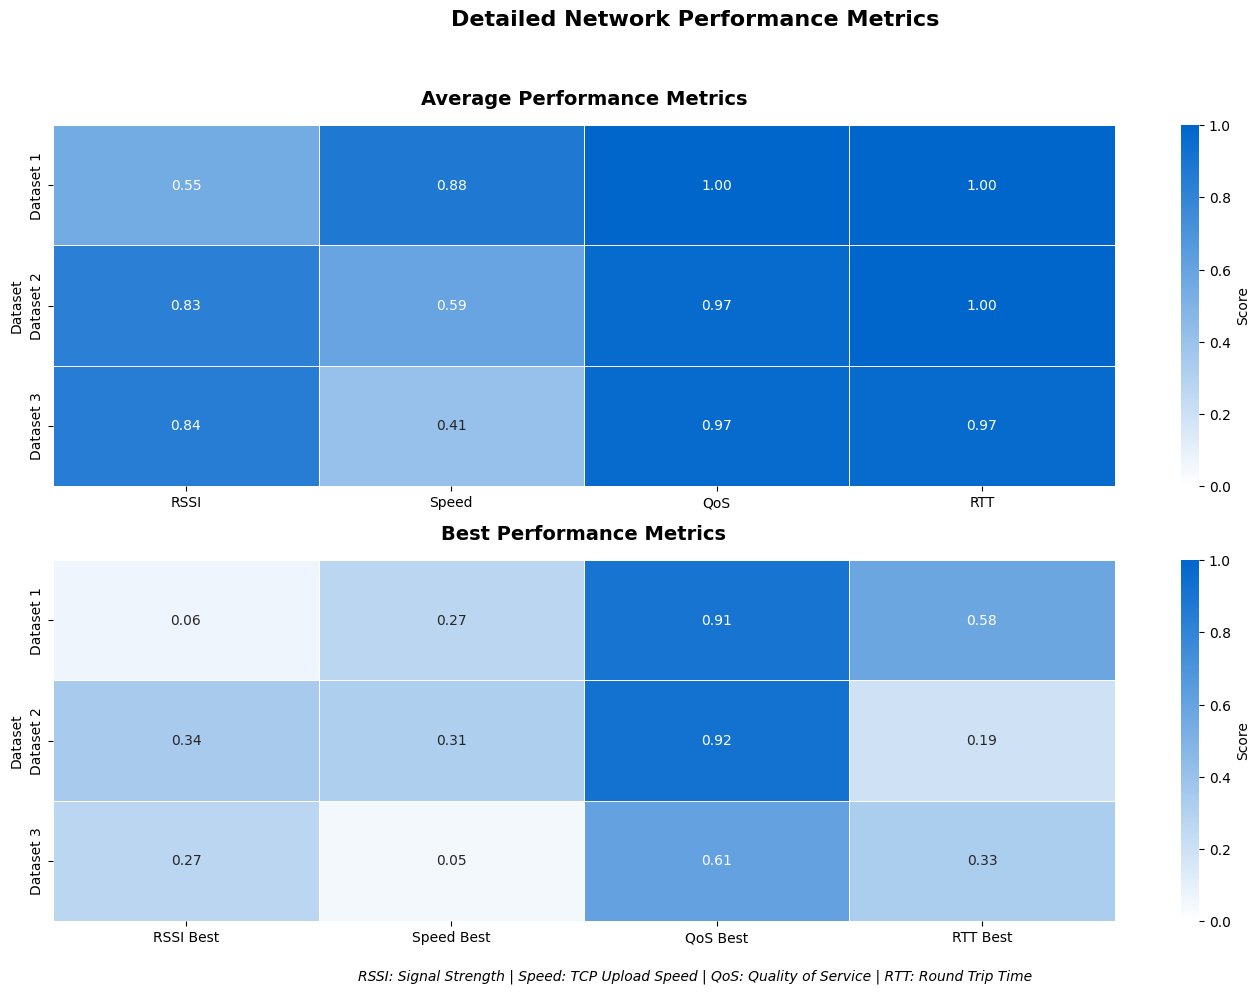

In [29]:
fig = detailed_performance_metrics(final_df)
plt.show()

I would choose **cellular provider 2** due to its stronger RSSI, superior peak performance, and better alignment with the project's goal of ensuring robust cellular infrastructure for data offloading and maintenance operations.



**Cellular Provider 2 strikes the perfect balance between strong signal coverage and consistent performance. Despite nearly identical overall connectivity (0.765 vs. 0.768), it dominates where it matters most. With a 56% stronger baseline RSSI (0.828 vs. 0.546) and a 47% higher Best Score (0.209 vs. 0.142), it delivers rock-solid coverage in critical areas, essential for real-time data offloading. While Cellular Provider 1 boasts faster upload speeds, Cellular Provider 2’s superior signal strength minimizes the need for infrastructure tweaks, making it the clear winner for facilities that prioritize reliability over small speed advantages.**

### Approximating the missing values for dataset 3 

However, we haven't considered what would happen if we didn't have the missing data for the two rows for dataset 3. So, I will approximate the missing values using the mean of the other values nearby and then calculate the score again.


In [ ]:
def fill_empty_nodes(df, empty_nodes, surrounding_nodes_map):
    df_result = df.copy()

    target_columns = ['RSSI (dBm)', 'TCP Upload Speed (Mbps)',
                      'TCP Upload QoS (%)', 'TCP Round Trip Time (ms)']

    for a, b in empty_nodes:
        surroundings = []
        for surr_a, surr_b in surrounding_nodes_map[(a, b)]:
            node_data = df[(df['Aisle Number'] == f'A{surr_a}') &
                           (df['Quad Number'] == f'B{surr_b}')]
            if not node_data.empty:
                surroundings.append(node_data)

        if surroundings:
            surrounding_df = pd.concat(surroundings)
            avg_values = surrounding_df[target_columns].mean()

            mask = (df_result['Aisle Number'] == f'A{a}') & (
                df_result['Quad Number'] == f'B{b}')

            if mask.any():
                for col in target_columns:
                    df_result.loc[mask, col] = avg_values[col]
                df_result.loc[mask, 'isDataPresent'] = True
            else:
                new_row = {
                    'Aisle Number': f'A{a}',
                    'Quad Number': f'B{b}',
                    'isDataPresent': True
                }
                for col in target_columns:
                    new_row[col] = avg_values[col]
                df_result = pd.concat(
                    [df_result, pd.DataFrame([new_row])], ignore_index=True)

    return df_result

In [31]:
empty_nodes = [(7, 2), (2, 8)]
surrounding_nodes_map = {
    (7, 2): [(6, 1), (6, 2), (6, 3), (7, 1), (7, 3), (8, 1), (8, 2), (8, 3)],
    (2, 8): [(1, 7), (1, 8), (2, 7), (3, 7), (3, 8)]
}

In [32]:
df_avg3_filled = fill_empty_nodes(df_avg3, empty_nodes, surrounding_nodes_map)
df_avg3_filled.isna().sum()

Aisle Number                0
Quad Number                 0
TCP Upload Speed (Mbps)     0
TCP Upload QoS (%)          0
TCP Round Trip Time (ms)    0
RSSI (dBm)                  0
isDataPresent               0
dtype: int64

Since, we focus on reliability and robustness, we will only consider the average values from now.
We used functions to calculate most of the results earlier, so we will use the same functions with this new data.


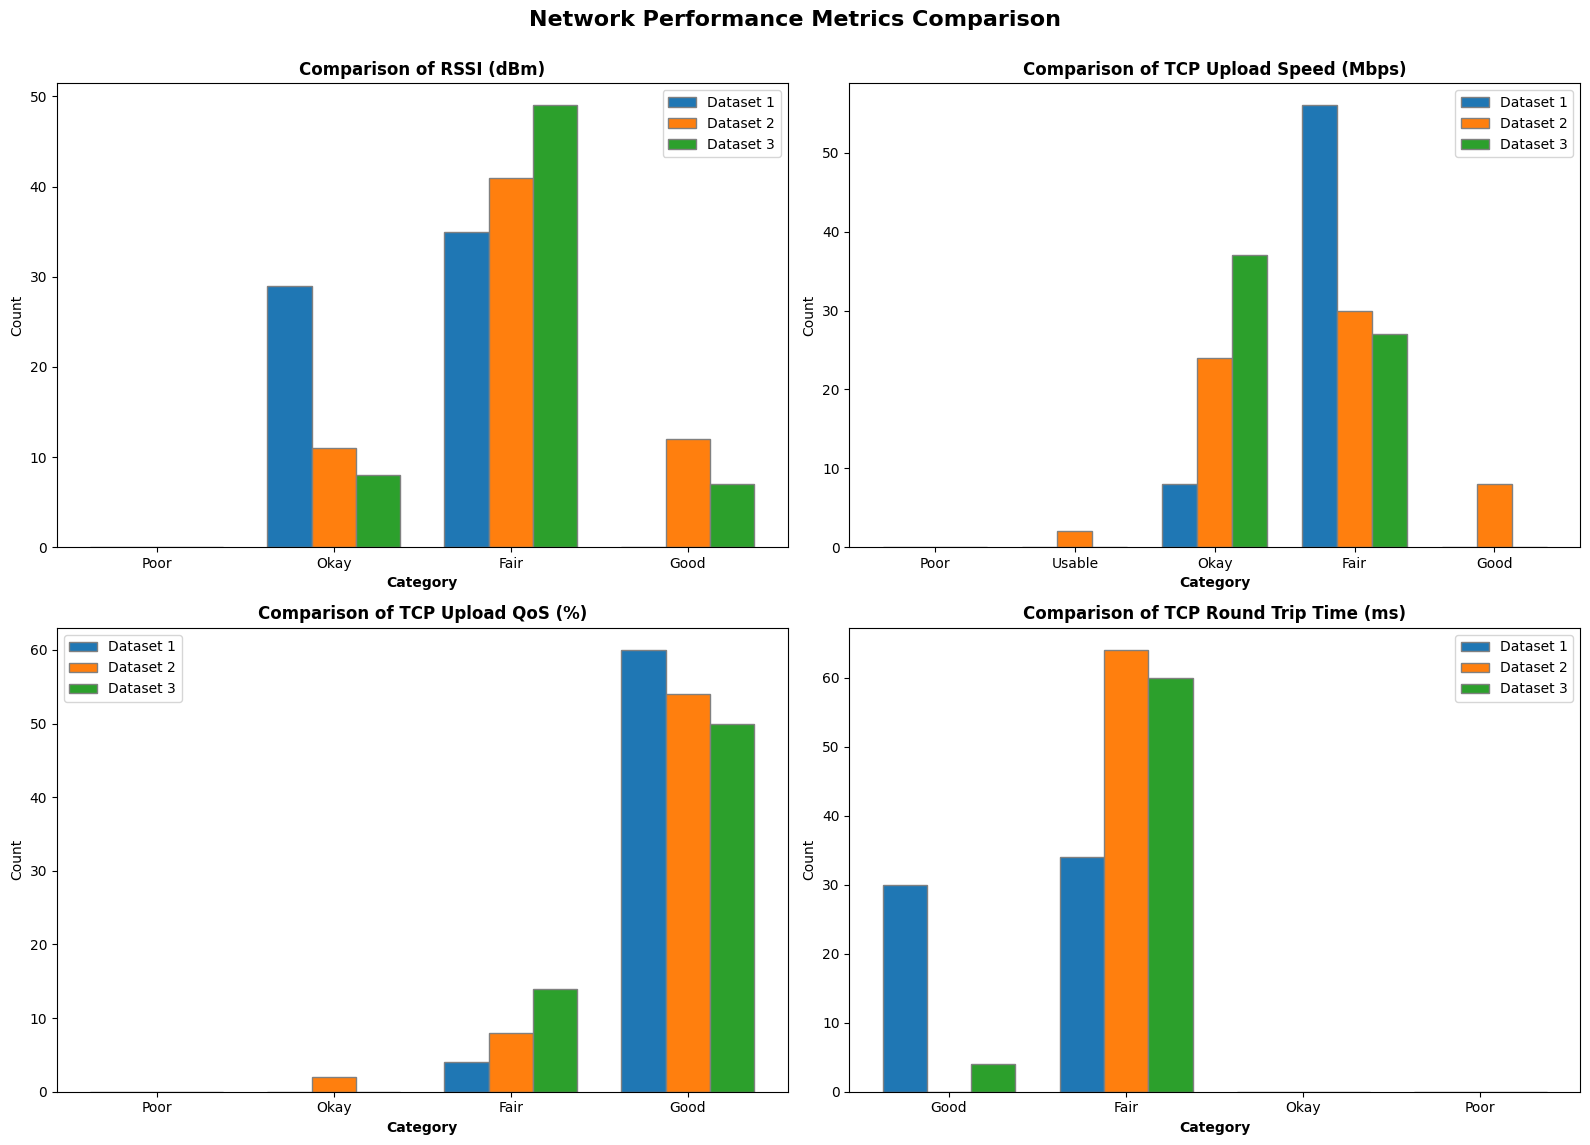

In [33]:
def create_combined_comparison_histogram(df1, df2, df3, metrics, bins, bin_labels, colors):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for idx, metric in enumerate(metrics):
        categories1 = pd.cut(df1[metric], bins=bins[metric],
                             labels=bin_labels[metric], right=False)
        categories2 = pd.cut(df2[metric], bins=bins[metric],
                             labels=bin_labels[metric], right=False)
        categories3 = pd.cut(df3[metric], bins=bins[metric],
                             labels=bin_labels[metric], right=False)

        category_counts1 = categories1.value_counts().reindex(
            bin_labels[metric], fill_value=0)
        category_counts2 = categories2.value_counts().reindex(
            bin_labels[metric], fill_value=0)
        category_counts3 = categories3.value_counts().reindex(
            bin_labels[metric], fill_value=0)

        bar_width = 0.25

        r1 = range(len(bin_labels[metric]))
        r2 = [x + bar_width for x in r1]
        r3 = [x + 2 * bar_width for x in r1]

        axes[idx].bar(r1, category_counts1, color=colors[0],
                      width=bar_width, edgecolor='grey', label='Dataset 1')
        axes[idx].bar(r2, category_counts2, color=colors[1],
                      width=bar_width, edgecolor='grey', label='Dataset 2')
        axes[idx].bar(r3, category_counts3, color=colors[2],
                      width=bar_width, edgecolor='grey', label='Dataset 3')

        axes[idx].set_xlabel('Category', fontweight='bold')
        axes[idx].set_xticks(
            [r + bar_width for r in range(len(bin_labels[metric]))])
        axes[idx].set_xticklabels(bin_labels[metric])
        axes[idx].set_ylabel('Count')
        axes[idx].set_title(f'Comparison of {metric}', fontweight='bold')

        axes[idx].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle('Network Performance Metrics Comparison',
                 fontsize=16, fontweight='bold')

    plt.show()


metrics = ['RSSI (dBm)', 'TCP Upload Speed (Mbps)',
           'TCP Upload QoS (%)', 'TCP Round Trip Time (ms)']
create_combined_comparison_histogram(
    df_avg1, df_avg2, df_avg3_filled, metrics, bins, bin_labels, colors)

In [34]:
def create_summary_table_filled(num_datasets, avg_dfs):
    def calculate_score(df):
        df = df.copy()
        df["RSSI Score"] = df["RSSI (dBm)"].apply(
            lambda x: 1 if x >= -96 else 0)
        df["Speed Score"] = df["TCP Upload Speed (Mbps)"].apply(
            lambda x: 1 if x >= 15 else 0)
        df["QoS Score"] = df["TCP Upload QoS (%)"].apply(
            lambda x: 1 if x >= 50 else 0)
        df["RTT Score"] = df["TCP Round Trip Time (ms)"].apply(
            lambda x: 1 if x <= 100 else 0)

        df["RSSI Best Score"] = df['RSSI (dBm)'].apply(
            lambda x: 1 if x >= -86 else 0)
        df["Speed Best Score"] = df['TCP Upload Speed (Mbps)'].apply(
            lambda x: 1 if x >= 30 else 0)
        df["QoS Best Score"] = df['TCP Upload QoS (%)'].apply(
            lambda x: 1 if x >= 70 else 0)
        df["RTT Best Score"] = df['TCP Round Trip Time (ms)'].apply(
            lambda x: 1 if x <= 50 else 0)

        return df

    data = []

    for i in range(num_datasets):
        df_avg = calculate_score(avg_dfs[i].copy())

        avg_row = [
            df_avg["RSSI Score"].mean(), df_avg["RSSI Best Score"].mean(),
            df_avg["Speed Score"].mean(), df_avg["Speed Best Score"].mean(),
            df_avg["QoS Score"].mean(), df_avg["QoS Best Score"].mean(),
            df_avg["RTT Score"].mean(), df_avg["RTT Best Score"].mean()
        ]
        weighted_avg_score = (
            avg_row[0] * 0.4 + avg_row[2] * 0.4 + avg_row[4] * 0.1 + avg_row[6] * 0.1)
        weighted_best_score = (
            avg_row[1] * 0.4 + avg_row[3] * 0.4 + avg_row[5] * 0.1 + avg_row[7] * 0.1)
        avg_row.extend([weighted_avg_score, weighted_best_score])

        data.append([f"Dataset {i+1}"] + avg_row)

    columns = ["Dataset", "Mean RSSI Score", "Mean RSSI Best Score", "Mean Speed Score", "Mean Speed Best Score",
               "Mean QoS Score", "Mean QoS Best Score", "Mean RTT Score", "Mean RTT Best Score",
               "Weighted Score", "Weighted Best Score"]
    df = pd.DataFrame(data, columns=columns)

    return df


num_datasets = 3
avg_dataframes = [df_avg1, df_avg2, df_avg3_filled]
final_df_2 = create_summary_table_filled(num_datasets, avg_dataframes)

final_df_2.style.background_gradient(cmap='Blues', axis=None)

,Dataset,Mean RSSI Score,Mean RSSI Best Score,Mean Speed Score,Mean Speed Best Score,Mean QoS Score,Mean QoS Best Score,Mean RTT Score,Mean RTT Best Score,Weighted Score,Weighted Best Score
0,Dataset 1,0.546875,0.000000,0.875000,0.000000,1.000000,0.937500,1.000000,0.484375,0.768750,0.142187
1,Dataset 2,0.828125,0.187500,0.593750,0.125000,0.968750,0.843750,1.000000,0.000000,0.765625,0.209375
2,Dataset 3,0.875000,0.109375,0.421875,0.000000,1.000000,0.781250,1.000000,0.062500,0.718750,0.128125


- Weighted Score: ((0.718750 - 0.693750) / 0.693750) \* 100 = 3.60%

- Weighted Best Score: ((0.128125 - 0.126563) / 0.126563) \* 100 = 1.24%


Even with the approximated missing data in Dataset 3, Cellular Provider 2 remains my preferred choice due to its consistency and reliable overall performance. This is reflected in its higher weighted scores, which are less influenced by peak, potentially transient performance.


### Repeater Placement Algorithm and Visualization:

The Repeater Placement Algorithm is designed to optimize the placement of repeaters within a given area to ensure robust cellular coverage. The algorithm takes into account the signal strength and distance to determine the most effective locations for repeater installation.



In [35]:
def min_repeaters(df, lower_bound=-96):
    working_df = df.copy(deep=True)

    working_df['Aisle_Num'] = working_df['Aisle Number'].str.extract(
        r'A(\d+)').astype(int)
    working_df['Quad_Num'] = working_df['Quad Number'].str.extract(
        r'B(\d+)').astype(int)

    working_df['RSSI_Original'] = working_df['RSSI (dBm)'].copy()

    boost_map = {
        (0, 0): 15,  # Center location
        (0, 1): 10, (1, 0): 10, (0, -1): 10, (-1, 0): 10,  # Adjacent
        (1, 1): 8, (1, -1): 8, (-1, 1): 8, (-1, -1): 8,  # Diagonal
        (0, 2): 5, (2, 0): 5, (0, -2): 5, (-2, 0): 5  # Two units away
    }

    repeaters = []

    while True:
        poor_locations = working_df[working_df['RSSI (dBm)'] < lower_bound]

        if poor_locations.empty:
            break

        worst_idx = poor_locations['RSSI (dBm)'].idxmin()
        worst_loc = working_df.loc[worst_idx]

        repeater_aisle = worst_loc['Aisle_Num']
        repeater_quad = worst_loc['Quad_Num']
        repeaters.append((f"A{repeater_aisle}", f"B{repeater_quad}"))

        for (da, dq), boost in boost_map.items():
            target_aisle = repeater_aisle + da
            target_quad = repeater_quad + dq

            if 1 <= target_aisle <= 8 and 1 <= target_quad <= 8:
                mask = (working_df['Aisle_Num'] == target_aisle) & (
                    working_df['Quad_Num'] == target_quad)

                if any(mask):
                    current_values = working_df.loc[mask, 'RSSI (dBm)'].values
                    working_df.loc[mask, 'RSSI (dBm)'] = current_values + boost

    result_df = working_df[['Aisle Number', 'Quad Number',
                            'RSSI_Original', 'RSSI (dBm)']].copy()
    result_df['Changed'] = result_df['RSSI (dBm)'] != result_df['RSSI_Original']

    return len(repeaters), repeaters, result_df

In [36]:
df_repeaters_fair = []
repeater_loc_1 = []
for i in range(3):
    num_repeater, repeater_loc, final_rssi_df = min_repeaters(
        avg_dataframes[i])
    new_df = avg_dataframes[i].copy()
    new_df['RSSI (dBm)'] = final_rssi_df['RSSI (dBm)'].copy()
    df_repeaters_fair.append(new_df)
    repeater_loc_1.append(repeater_loc)
    print(f'Dataset {i+1}: {num_repeater} repeaters needed to improve all "Poor" or "Acceptable" RSSI values to at least "Fair".')

Dataset 1: 9 repeaters needed to improve all "Poor" or "Acceptable" RSSI values to at least "Fair".
Dataset 2: 5 repeaters needed to improve all "Poor" or "Acceptable" RSSI values to at least "Fair".
Dataset 3: 4 repeaters needed to improve all "Poor" or "Acceptable" RSSI values to at least "Fair".


In [37]:
num_datasets = 3
dfs_avg = [df_avg1, df_avg2, df_avg3_filled]
dfs_max = df_repeaters_fair
interactive_grid = create_interactive_grid_plots(
    num_datasets, dfs_avg, dfs_max, show_repeaters=True, repeater_locations=repeater_loc_1)


display(interactive_grid)

Total cells: 64, Missing cells: 0


In [38]:
lower_bound_for_good = -86

dfs_repeaters_good = []
repeater_loc_2 = []

for i in range(3):
    num_repeater, repeater_loc, final_rssi_df = min_repeaters(
        avg_dataframes[i], lower_bound=lower_bound_for_good)
    new_df = avg_dataframes[i].copy()
    new_df['RSSI (dBm)'] = final_rssi_df['RSSI (dBm)'].copy()
    repeater_loc_2.append(repeater_loc)
    dfs_repeaters_good.append(new_df)
    print(
        f'Dataset {i+1}: {num_repeater} repeaters needed to improve all RSSI values to at least "Good".')

Dataset 1: 13 repeaters needed to improve all RSSI values to at least "Good".
Dataset 2: 14 repeaters needed to improve all RSSI values to at least "Good".
Dataset 3: 13 repeaters needed to improve all RSSI values to at least "Good".


In [39]:
num_datasets = 3
dfs_avg = [df_avg1, df_avg2, df_avg3_filled]
dfs_max = dfs_repeaters_good

interactive_grid = create_interactive_grid_plots(
    num_datasets, dfs_avg, dfs_max, repeater_locations=repeater_loc_2, show_repeaters=True)

display(interactive_grid)

Total cells: 64, Missing cells: 0


### Line Graph 
Compares the increase in RSSI after addition of repeeaters for all cellular providers.


In [40]:
def interactive_line_graph(dataset_count, dfs, dfs_c):
    dataset_selector = widgets.Dropdown(
        options=[(f'Cellular Provider {i+1}', i)
                 for i in range(dataset_count)],
        description='Cellular Provider:',
        style={'description_width': 'initial'}
    )

    output = widgets.Output()

    def update_plot(dataset_idx):
        with output:
            output.clear_output(wait=True)
            df1 = dfs[dataset_idx]
            df2 = dfs_c[dataset_idx]

            fig = go.Figure()
            fig.add_trace(go.Scatter(
                x=df1.index, y=df1['RSSI (dBm)'], mode='lines', name='Original'))
            fig.add_trace(go.Scatter(
                x=df2.index, y=df2['RSSI (dBm)'], mode='lines', name='Modified'))

            fig.update_layout(title=f'Comparison of RSSI (dBm) for Dataset {dataset_idx+1}',
                              xaxis_title='Index',
                              yaxis_title='RSSI (dBm)',
                              template='plotly_white')
            fig.show()

    dataset_selector.observe(
        lambda change: update_plot(change['new']), names='value')

    display(dataset_selector, output)
    update_plot(0)

In [41]:
# Boosted RSSI values after adding repeaters
num_datasets = 3
dfs = [df_avg1, df_avg2, df_avg3_filled]
dfs_c = df_repeaters_fair

interactive_line_graph(num_datasets, dfs, dfs_c)

Dropdown(description='Cellular Provider:', options=(('Cellular Provider 1', 0), ('Cellular Provider 2', 1), ('…

Output()

Now, let's calculate the score for the boosted values using repeaters. We will use the same formula as before.
We will use the dataframe where we boosted the RSSI values to be atleast fair.


In [42]:
num_datasets = 3
final_df = create_summary_table_filled(num_datasets, df_repeaters_fair)
final_df.style.background_gradient(cmap='Blues', axis=None)

,Dataset,Mean RSSI Score,Mean RSSI Best Score,Mean Speed Score,Mean Speed Best Score,Mean QoS Score,Mean QoS Best Score,Mean RTT Score,Mean RTT Best Score,Weighted Score,Weighted Best Score
0,Dataset 1,1.000000,0.718750,0.875000,0.000000,1.000000,0.937500,1.000000,0.484375,0.950000,0.429688
1,Dataset 2,1.000000,0.562500,0.593750,0.125000,0.968750,0.843750,1.000000,0.000000,0.834375,0.359375
2,Dataset 3,1.000000,0.484375,0.421875,0.000000,1.000000,0.781250,1.000000,0.062500,0.768750,0.278125


In [43]:
create_interactive_histograms(3, dfs_avg, df_repeaters_fair)

For the facility (quads of ~50x50 ft²), a single repeater like the SureCall Fusion4Home (~$399-$499 USD) should suffice for covering a quad and its surroundings effectively. If we need broader coverage or higher reliability across multiple quads simultaneously, we can consider the WilsonPro 70 Plus (~$1500) or Cel-Fi GO X models(~$1000).

Let's just consider the average cost for a single repeater to be approximately $1000.

So, the costs to boost signal to atleast _fair_ for each cellular provider would be:

- Cellular Provider 1: ~$9000
- Cellular Provider 2: ~$5000
- Cellular Provider 3: ~$4000


If budget is not a restriction, I would recommend the following:

- **Cellular Provider 1**: It is the best choice for a transit agency priortizing performance and reliability for operations like data offloading. It requires more repeaters, but the investment is justified by the significant improvement in performance and reliability.

If budget is a concern, I would recommend the following:

- **Cellular Provider 2**: Stick with Cellular Provider 2, as it offers a good balance of performance and cost-effectiveness. It requires fewer repeaters, making it a more budget-friendly option while still providing reliable coverage.


**I would go with _Cellular Provider 2_ as Cellular Provider 2 delivers 80% of Cellular Provider 1’s performance at 55% of the repeater cost**